In [5]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import *
from keras.layers import *
from keras.datasets import mnist
import os

In [6]:

OUT_DIR = './CNN_out'
img_shape = (28, 28, 1)
epochs = 100000
batch_size = 128
noise = 100
sample_interval = 100

In [7]:

(x_train, y_train), (_, _) = mnist.load_data()
print(x_train.shape)
MY_NUMBER = 4
x_train = x_train[y_train == MY_NUMBER]
x_train = x_train / 127.5 - 1
x_train = np.expand_dims(x_train, axis=3)         # expand_dims : 차원 확장
print(x_train.shape)

(60000, 28, 28)
(5842, 28, 28, 1)


In [8]:
generator = Sequential()
generator.add(Dense(256*7*7, input_dim=noise))
generator.add(Reshape((7, 7, 256)))
generator.add(Conv2DTranspose(128, kernel_size = 3, strides = 2, padding = 'same'))
generator.add(BatchNormalization())
generator.add(LeakyReLU(alpha=0.01))
generator.add(Conv2DTranspose(64, kernel_size = 3, strides = 1, padding = 'same'))
generator.add(BatchNormalization())
generator.add(LeakyReLU(alpha=0.01))
generator.add(Conv2DTranspose(1, kernel_size = 3, strides = 2, padding = 'same'))
generator.add(Activation('tanh'))
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12544)             1266944   
                                                                 
 reshape (Reshape)           (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 128)      295040    
 nspose)                                                         
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 128)      512       
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 14, 14, 128)       0         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 14, 14, 64)       7

In [9]:
discriminator = Sequential()
discriminator.add(Conv2D(32, kernel_size = 3, strides = 2, padding = 'same', input_shape=img_shape))   # strides를 쓸 경우, MaxPoolD를 굳이 쓰지 않아도 된다.
discriminator.add(LeakyReLU(alpha = 0.01))

discriminator.add(Conv2D(64, kernel_size = 3, strides = 2, padding = 'same'))
discriminator.add(LeakyReLU(alpha = 0.01))
discriminator.add(Conv2D(128, kernel_size = 3, strides = 2, padding = 'same'))
discriminator.add(LeakyReLU(alpha = 0.01))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 32)        320       
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 7, 7, 64)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 4, 4, 128)         0         
                                                                 
 flatten (Flatten)           (None, 2048)             

In [10]:
discriminator.compile(loss='binary_crossentropy', optimizer='adam',
                      metrics=['accuracy'])
discriminator.trainable = False

gan_model = Sequential()
gan_model.add(generator)
gan_model.add(discriminator)
gan_model.summary()
gan_model.compile(loss='binary_crossentropy', optimizer='adam')

real = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 28, 28, 1)         1637121   
                                                                 
 sequential_1 (Sequential)   (None, 1)                 94721     
                                                                 
Total params: 1,731,842
Trainable params: 1,636,737
Non-trainable params: 95,105
_________________________________________________________________


4/4 [==============================] - 8s 15ms/step
0, [D_loss: 0.710154, acc.: 0.04%], [G_loss: 0.627073]
1/1 [==============================] - 0s 166ms/step


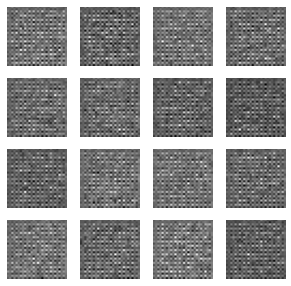

4/4 [==============================] - 0s 4ms/step
100, [D_loss: 0.000113, acc.: 1.00%], [G_loss: 0.017949]
1/1 [==============================] - 0s 16ms/step


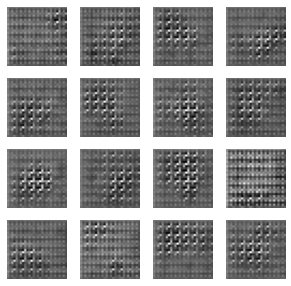

4/4 [==============================] - 0s 4ms/step
200, [D_loss: 0.000029, acc.: 1.00%], [G_loss: 0.012963]
1/1 [==============================] - 0s 16ms/step


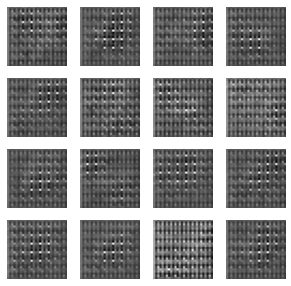

4/4 [==============================] - 0s 5ms/step
300, [D_loss: 0.000091, acc.: 1.00%], [G_loss: 0.009915]
1/1 [==============================] - 0s 16ms/step


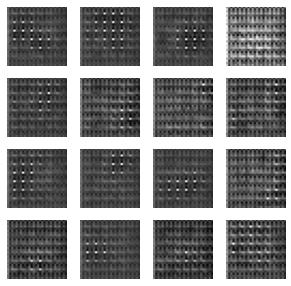

4/4 [==============================] - 0s 6ms/step
400, [D_loss: 0.007678, acc.: 1.00%], [G_loss: 4.587942]
1/1 [==============================] - 0s 16ms/step


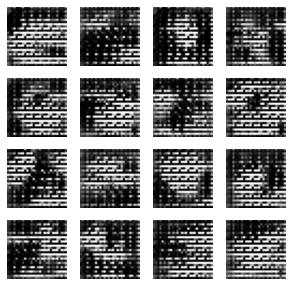

4/4 [==============================] - 0s 5ms/step
500, [D_loss: 0.025025, acc.: 0.99%], [G_loss: 1.775850]
1/1 [==============================] - 0s 17ms/step


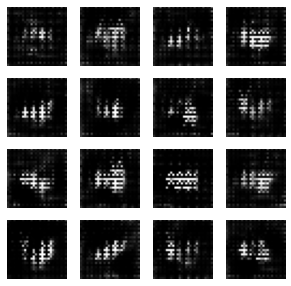

4/4 [==============================] - 0s 6ms/step
600, [D_loss: 0.014067, acc.: 1.00%], [G_loss: 1.837148]
1/1 [==============================] - 0s 17ms/step


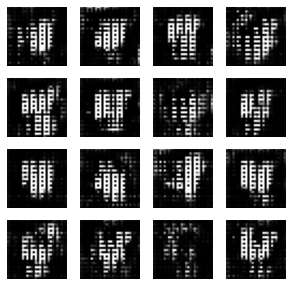

4/4 [==============================] - 0s 4ms/step
700, [D_loss: 0.131378, acc.: 0.96%], [G_loss: 1.867288]
1/1 [==============================] - 0s 23ms/step


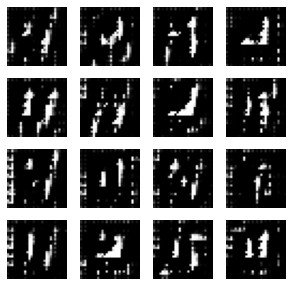

4/4 [==============================] - 0s 4ms/step
800, [D_loss: 0.008560, acc.: 1.00%], [G_loss: 0.732951]
1/1 [==============================] - 0s 16ms/step


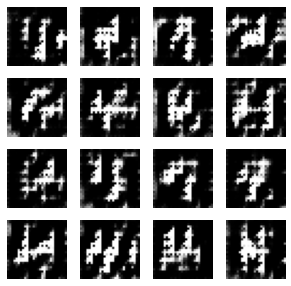

4/4 [==============================] - 0s 6ms/step
900, [D_loss: 0.098522, acc.: 0.98%], [G_loss: 3.837191]
1/1 [==============================] - 0s 15ms/step


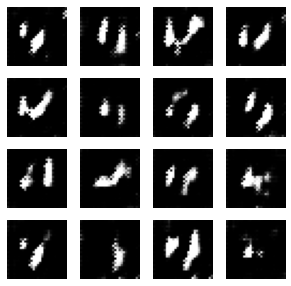

4/4 [==============================] - 0s 5ms/step
1000, [D_loss: 0.075298, acc.: 0.99%], [G_loss: 3.806269]
1/1 [==============================] - 0s 16ms/step


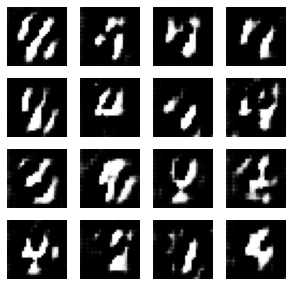

4/4 [==============================] - 0s 6ms/step
1100, [D_loss: 0.151767, acc.: 0.95%], [G_loss: 3.235518]
1/1 [==============================] - 0s 19ms/step


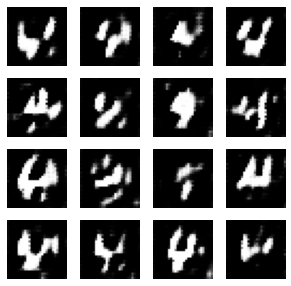

4/4 [==============================] - 0s 6ms/step
1200, [D_loss: 0.265550, acc.: 0.87%], [G_loss: 2.781876]
1/1 [==============================] - 0s 16ms/step


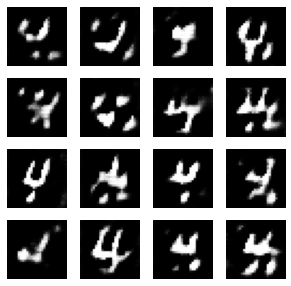

4/4 [==============================] - 0s 6ms/step
1300, [D_loss: 0.143312, acc.: 0.95%], [G_loss: 4.624841]
1/1 [==============================] - 0s 20ms/step


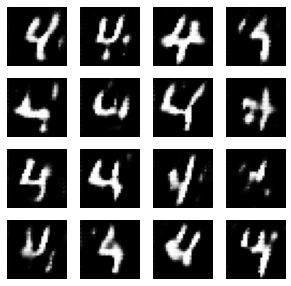

4/4 [==============================] - 0s 5ms/step
1400, [D_loss: 0.031393, acc.: 1.00%], [G_loss: 3.562582]
1/1 [==============================] - 0s 23ms/step


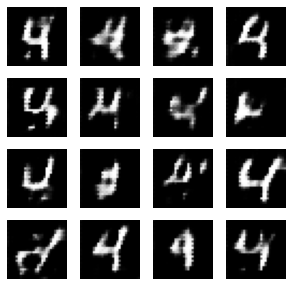

4/4 [==============================] - 0s 4ms/step
1500, [D_loss: 0.069740, acc.: 0.99%], [G_loss: 3.990761]
1/1 [==============================] - 0s 16ms/step


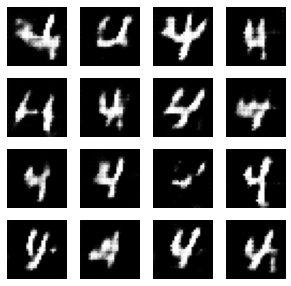

4/4 [==============================] - 0s 3ms/step
1600, [D_loss: 0.344169, acc.: 0.86%], [G_loss: 2.282928]
1/1 [==============================] - 0s 21ms/step


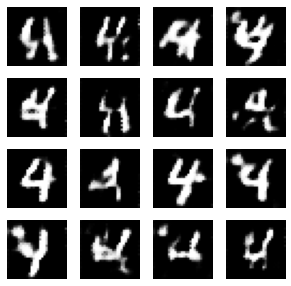

4/4 [==============================] - 0s 5ms/step
1700, [D_loss: 0.197754, acc.: 0.91%], [G_loss: 3.581236]
1/1 [==============================] - 0s 19ms/step


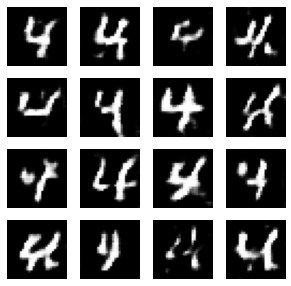

4/4 [==============================] - 0s 4ms/step
1800, [D_loss: 0.176280, acc.: 0.92%], [G_loss: 2.807319]
1/1 [==============================] - 0s 17ms/step


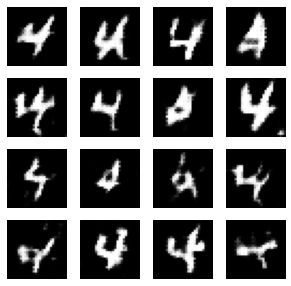

4/4 [==============================] - 0s 4ms/step
1900, [D_loss: 0.128727, acc.: 0.95%], [G_loss: 3.655125]
1/1 [==============================] - 0s 15ms/step


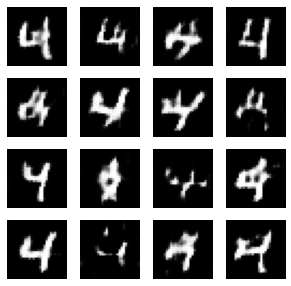

4/4 [==============================] - 0s 7ms/step
2000, [D_loss: 0.234883, acc.: 0.93%], [G_loss: 2.860901]
1/1 [==============================] - 0s 16ms/step


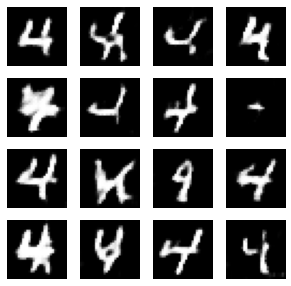

4/4 [==============================] - 0s 6ms/step
2100, [D_loss: 0.599117, acc.: 0.71%], [G_loss: 2.350165]
1/1 [==============================] - 0s 20ms/step


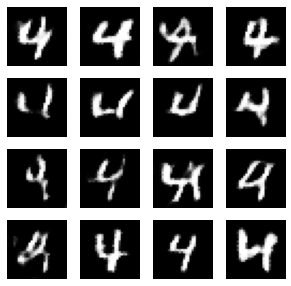

4/4 [==============================] - 0s 4ms/step
2200, [D_loss: 0.239277, acc.: 0.91%], [G_loss: 2.716026]
1/1 [==============================] - 0s 16ms/step


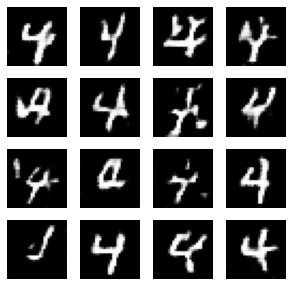

4/4 [==============================] - 0s 4ms/step
2300, [D_loss: 0.106964, acc.: 0.97%], [G_loss: 3.768853]
1/1 [==============================] - 0s 32ms/step


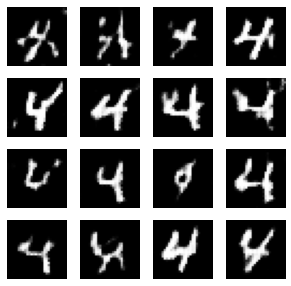

4/4 [==============================] - 0s 4ms/step
2400, [D_loss: 0.166161, acc.: 0.93%], [G_loss: 3.938247]
1/1 [==============================] - 0s 21ms/step


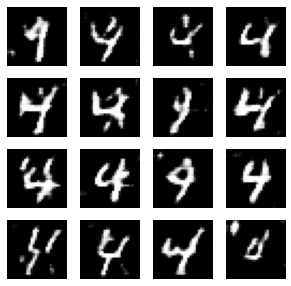

4/4 [==============================] - 0s 9ms/step
2500, [D_loss: 0.144999, acc.: 0.95%], [G_loss: 3.274420]
1/1 [==============================] - 0s 22ms/step


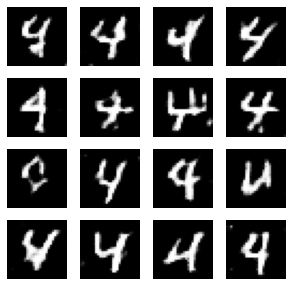

4/4 [==============================] - 0s 4ms/step
2600, [D_loss: 0.105225, acc.: 0.97%], [G_loss: 3.348038]
1/1 [==============================] - 0s 21ms/step


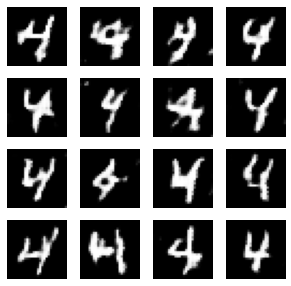

4/4 [==============================] - 0s 5ms/step
2700, [D_loss: 0.173857, acc.: 0.95%], [G_loss: 2.953016]
1/1 [==============================] - 0s 18ms/step


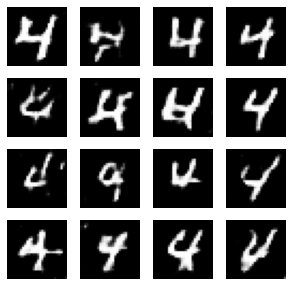

4/4 [==============================] - 0s 4ms/step
2800, [D_loss: 0.221891, acc.: 0.93%], [G_loss: 2.722399]
1/1 [==============================] - 0s 22ms/step


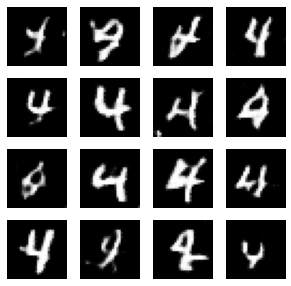

4/4 [==============================] - 0s 4ms/step
2900, [D_loss: 0.359031, acc.: 0.82%], [G_loss: 2.551295]
1/1 [==============================] - 0s 18ms/step


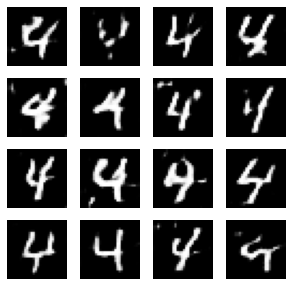

4/4 [==============================] - 0s 5ms/step
3000, [D_loss: 0.555889, acc.: 0.70%], [G_loss: 1.725355]
1/1 [==============================] - 0s 15ms/step


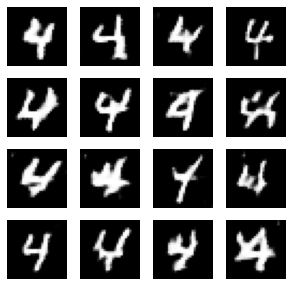

4/4 [==============================] - 0s 4ms/step
3100, [D_loss: 0.405377, acc.: 0.83%], [G_loss: 2.710742]
1/1 [==============================] - 0s 20ms/step


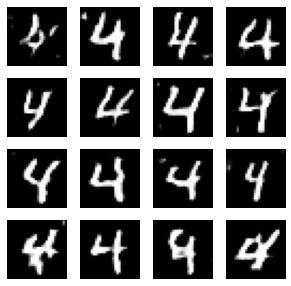

4/4 [==============================] - 0s 5ms/step
3200, [D_loss: 0.259162, acc.: 0.91%], [G_loss: 2.837176]
1/1 [==============================] - 0s 16ms/step


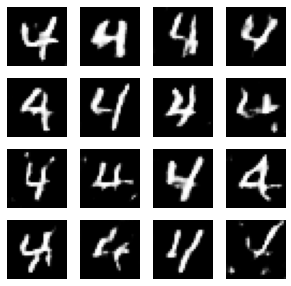

4/4 [==============================] - 0s 3ms/step
3300, [D_loss: 0.228903, acc.: 0.90%], [G_loss: 3.257090]
1/1 [==============================] - 0s 17ms/step


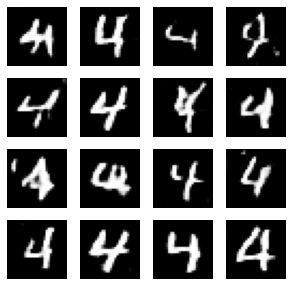

4/4 [==============================] - 0s 6ms/step
3400, [D_loss: 0.257607, acc.: 0.90%], [G_loss: 3.434335]
1/1 [==============================] - 0s 17ms/step


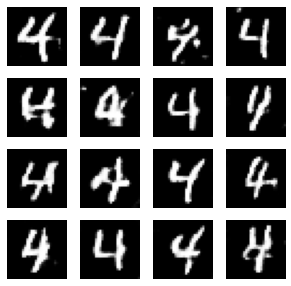

4/4 [==============================] - 0s 5ms/step
3500, [D_loss: 0.219945, acc.: 0.93%], [G_loss: 3.251280]
1/1 [==============================] - 0s 26ms/step


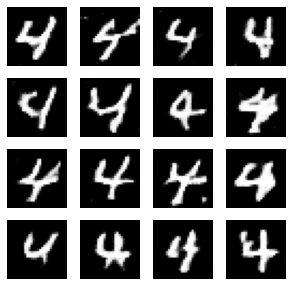

4/4 [==============================] - 0s 5ms/step
3600, [D_loss: 0.244196, acc.: 0.91%], [G_loss: 2.924083]
1/1 [==============================] - 0s 23ms/step


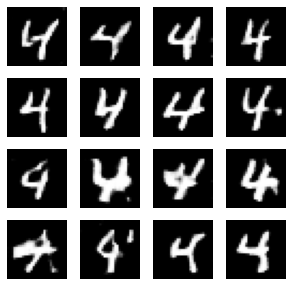

4/4 [==============================] - 0s 6ms/step
3700, [D_loss: 0.307334, acc.: 0.86%], [G_loss: 2.668766]
1/1 [==============================] - 0s 23ms/step


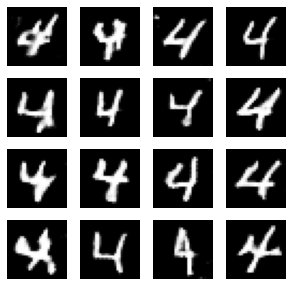

4/4 [==============================] - 0s 7ms/step
3800, [D_loss: 0.358941, acc.: 0.86%], [G_loss: 2.597291]
1/1 [==============================] - 0s 23ms/step


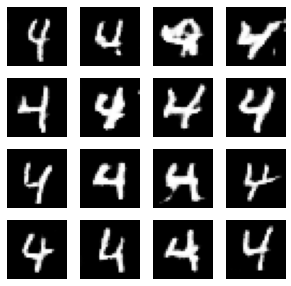

4/4 [==============================] - 0s 4ms/step
3900, [D_loss: 0.420435, acc.: 0.83%], [G_loss: 1.883747]
1/1 [==============================] - 0s 18ms/step


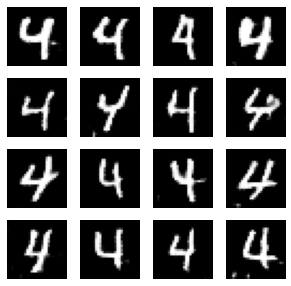

4/4 [==============================] - 0s 5ms/step
4000, [D_loss: 0.273310, acc.: 0.88%], [G_loss: 2.439614]
1/1 [==============================] - 0s 21ms/step


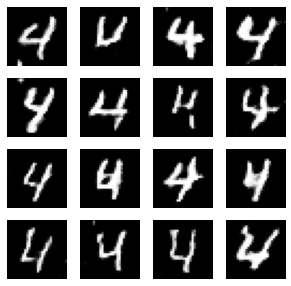

4/4 [==============================] - 0s 4ms/step
4100, [D_loss: 0.193026, acc.: 0.93%], [G_loss: 3.505195]
1/1 [==============================] - 0s 28ms/step


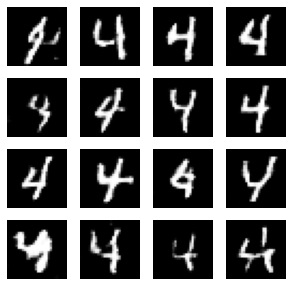

4/4 [==============================] - 0s 3ms/step
4200, [D_loss: 0.430091, acc.: 0.80%], [G_loss: 2.482326]
1/1 [==============================] - 0s 15ms/step


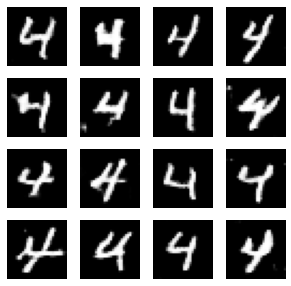

4/4 [==============================] - 0s 7ms/step
4300, [D_loss: 0.301548, acc.: 0.88%], [G_loss: 2.254417]
1/1 [==============================] - 0s 15ms/step


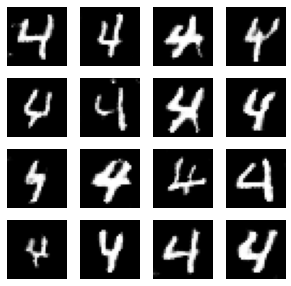

4/4 [==============================] - 0s 4ms/step
4400, [D_loss: 0.121481, acc.: 0.97%], [G_loss: 3.373412]
1/1 [==============================] - 0s 21ms/step


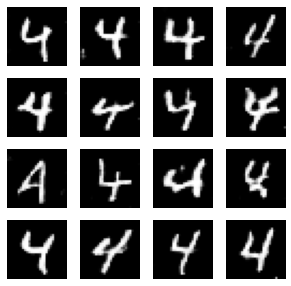

4/4 [==============================] - 0s 6ms/step
4500, [D_loss: 0.247729, acc.: 0.92%], [G_loss: 2.964097]
1/1 [==============================] - 0s 18ms/step


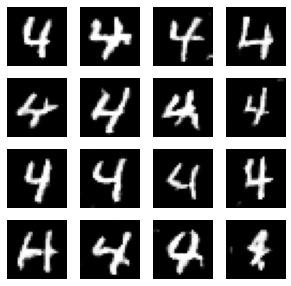

4/4 [==============================] - 0s 5ms/step
4600, [D_loss: 0.401640, acc.: 0.82%], [G_loss: 2.487692]
1/1 [==============================] - 0s 21ms/step


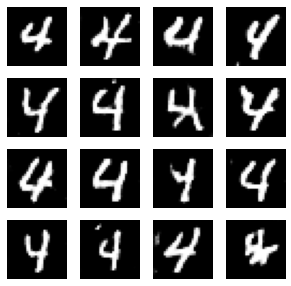

4/4 [==============================] - 0s 4ms/step
4700, [D_loss: 0.466841, acc.: 0.78%], [G_loss: 1.709859]
1/1 [==============================] - 0s 24ms/step


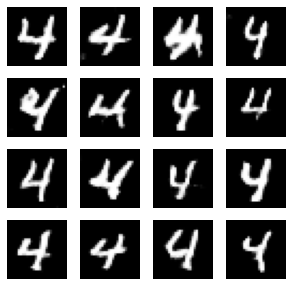

4/4 [==============================] - 0s 6ms/step
4800, [D_loss: 0.271592, acc.: 0.89%], [G_loss: 2.786775]
1/1 [==============================] - 0s 18ms/step


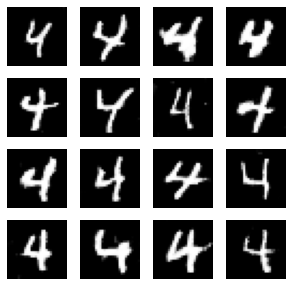

4/4 [==============================] - 0s 4ms/step
4900, [D_loss: 0.400464, acc.: 0.81%], [G_loss: 2.196844]
1/1 [==============================] - 0s 21ms/step


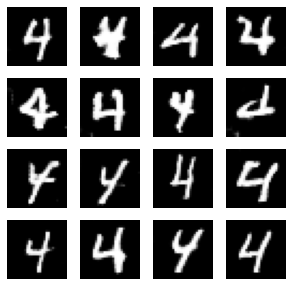

4/4 [==============================] - 0s 6ms/step
5000, [D_loss: 0.383765, acc.: 0.86%], [G_loss: 2.188180]
1/1 [==============================] - 0s 28ms/step


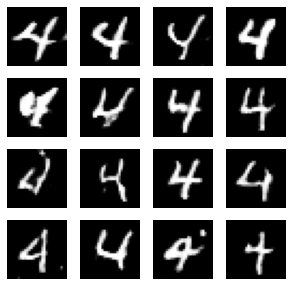

4/4 [==============================] - 0s 4ms/step
5100, [D_loss: 0.405463, acc.: 0.83%], [G_loss: 1.834350]
1/1 [==============================] - 0s 19ms/step


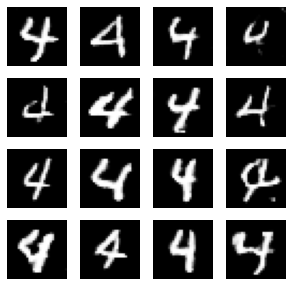

4/4 [==============================] - 0s 6ms/step
5200, [D_loss: 0.189045, acc.: 0.93%], [G_loss: 3.608769]
1/1 [==============================] - 0s 22ms/step


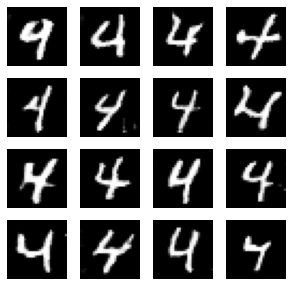

4/4 [==============================] - 0s 5ms/step
5300, [D_loss: 0.187189, acc.: 0.93%], [G_loss: 2.923430]
1/1 [==============================] - 0s 16ms/step


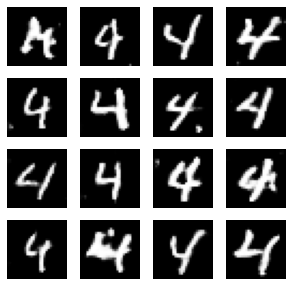

4/4 [==============================] - 0s 4ms/step
5400, [D_loss: 0.290692, acc.: 0.88%], [G_loss: 2.516870]
1/1 [==============================] - 0s 19ms/step


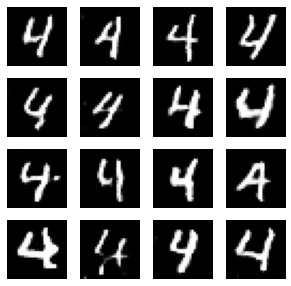

4/4 [==============================] - 0s 5ms/step
5500, [D_loss: 0.465847, acc.: 0.78%], [G_loss: 2.204184]
1/1 [==============================] - 0s 18ms/step


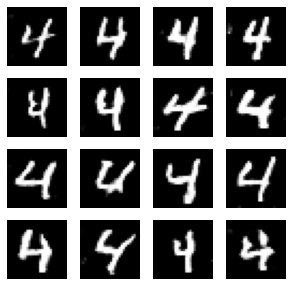

4/4 [==============================] - 0s 4ms/step
5600, [D_loss: 0.220840, acc.: 0.90%], [G_loss: 2.920804]
1/1 [==============================] - 0s 22ms/step


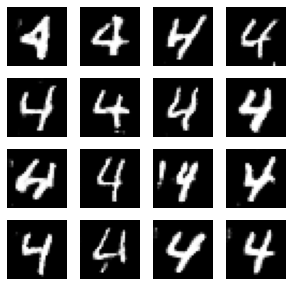

4/4 [==============================] - 0s 6ms/step
5700, [D_loss: 0.302534, acc.: 0.85%], [G_loss: 2.976361]
1/1 [==============================] - 0s 21ms/step


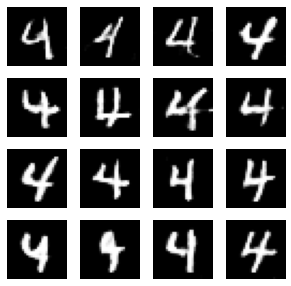

4/4 [==============================] - 0s 6ms/step
5800, [D_loss: 0.311419, acc.: 0.85%], [G_loss: 2.788186]
1/1 [==============================] - 0s 28ms/step


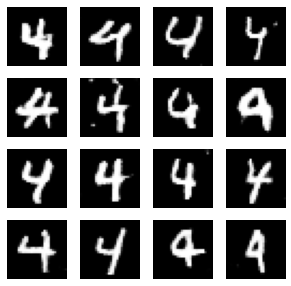

4/4 [==============================] - 0s 7ms/step
5900, [D_loss: 0.346979, acc.: 0.85%], [G_loss: 2.880466]
1/1 [==============================] - 0s 24ms/step


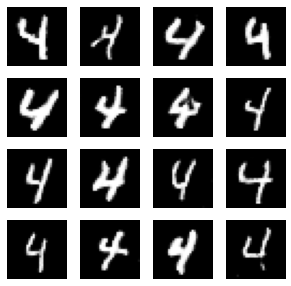

4/4 [==============================] - 0s 4ms/step
6000, [D_loss: 0.358787, acc.: 0.85%], [G_loss: 2.833040]
1/1 [==============================] - 0s 24ms/step


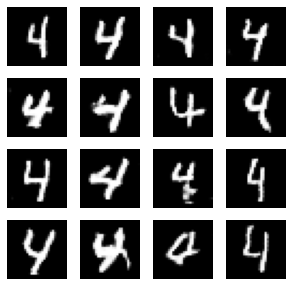

4/4 [==============================] - 0s 7ms/step
6100, [D_loss: 0.225750, acc.: 0.92%], [G_loss: 2.361343]
1/1 [==============================] - 0s 19ms/step


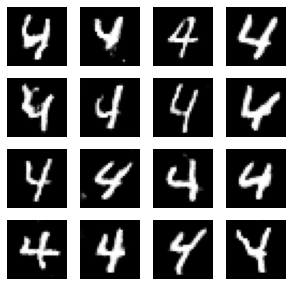

4/4 [==============================] - 0s 6ms/step
6200, [D_loss: 0.352134, acc.: 0.83%], [G_loss: 2.352880]
1/1 [==============================] - 0s 14ms/step


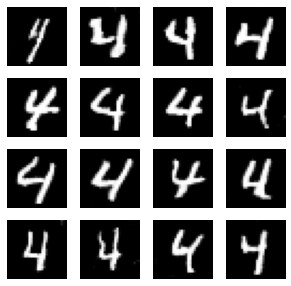

4/4 [==============================] - 0s 4ms/step
6300, [D_loss: 0.261107, acc.: 0.90%], [G_loss: 2.606446]
1/1 [==============================] - 0s 14ms/step


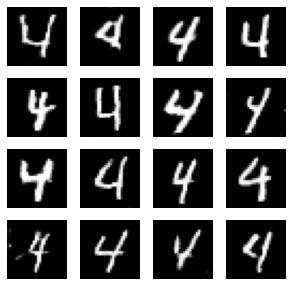

4/4 [==============================] - 0s 5ms/step
6400, [D_loss: 0.361544, acc.: 0.84%], [G_loss: 2.224350]
1/1 [==============================] - 0s 29ms/step


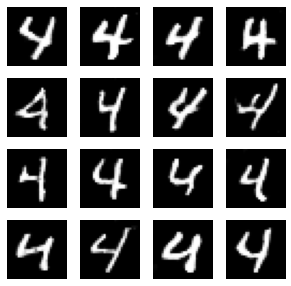

4/4 [==============================] - 0s 4ms/step
6500, [D_loss: 0.210211, acc.: 0.93%], [G_loss: 3.109981]
1/1 [==============================] - 0s 21ms/step


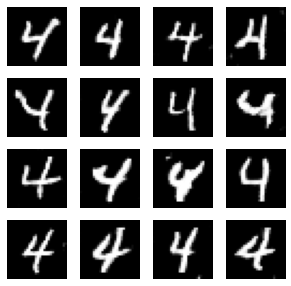

4/4 [==============================] - 0s 7ms/step
6600, [D_loss: 0.362799, acc.: 0.85%], [G_loss: 2.688045]
1/1 [==============================] - 0s 21ms/step


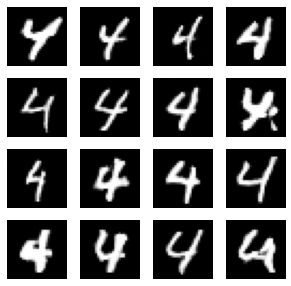

4/4 [==============================] - 0s 5ms/step
6700, [D_loss: 0.418020, acc.: 0.82%], [G_loss: 2.319885]
1/1 [==============================] - 0s 21ms/step


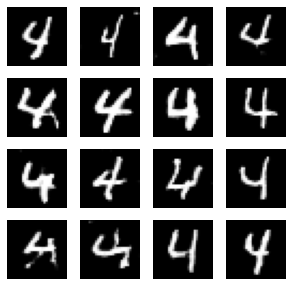

4/4 [==============================] - 0s 7ms/step
6800, [D_loss: 0.281591, acc.: 0.87%], [G_loss: 2.236717]
1/1 [==============================] - 0s 22ms/step


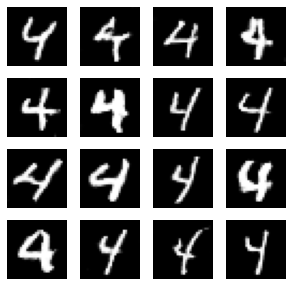

4/4 [==============================] - 0s 3ms/step
6900, [D_loss: 0.353804, acc.: 0.86%], [G_loss: 2.420866]
1/1 [==============================] - 0s 30ms/step


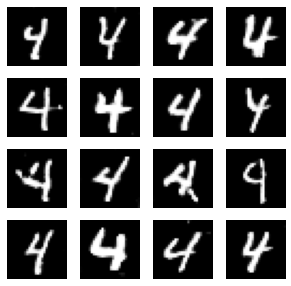

4/4 [==============================] - 0s 4ms/step
7000, [D_loss: 0.395701, acc.: 0.82%], [G_loss: 2.495391]
1/1 [==============================] - 0s 21ms/step


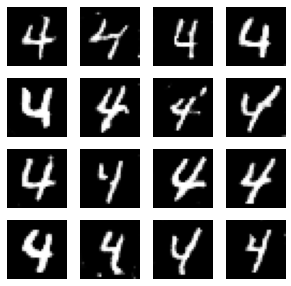

4/4 [==============================] - 0s 4ms/step
7100, [D_loss: 0.320104, acc.: 0.88%], [G_loss: 2.322619]
1/1 [==============================] - 0s 29ms/step


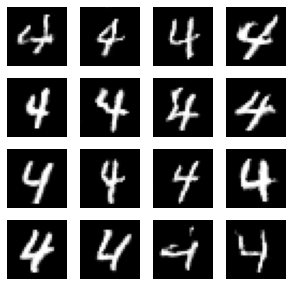

4/4 [==============================] - 0s 5ms/step
7200, [D_loss: 0.280900, acc.: 0.88%], [G_loss: 2.430667]
1/1 [==============================] - 0s 20ms/step


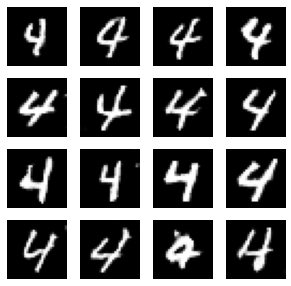

4/4 [==============================] - 0s 7ms/step
7300, [D_loss: 0.313583, acc.: 0.86%], [G_loss: 2.928716]
1/1 [==============================] - 0s 23ms/step


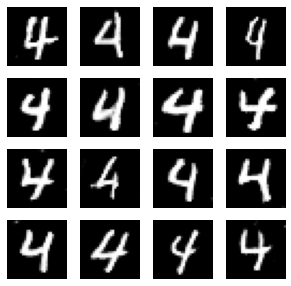

4/4 [==============================] - 0s 4ms/step
7400, [D_loss: 0.399569, acc.: 0.85%], [G_loss: 2.337275]
1/1 [==============================] - 0s 23ms/step


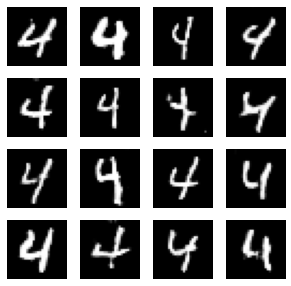

4/4 [==============================] - 0s 5ms/step
7500, [D_loss: 0.204716, acc.: 0.92%], [G_loss: 2.818278]
1/1 [==============================] - 0s 21ms/step


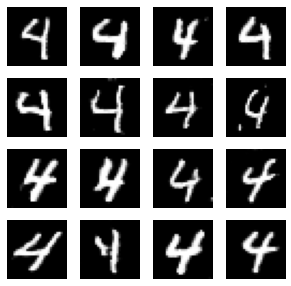

4/4 [==============================] - 0s 5ms/step
7600, [D_loss: 0.275954, acc.: 0.87%], [G_loss: 2.808545]
1/1 [==============================] - 0s 21ms/step


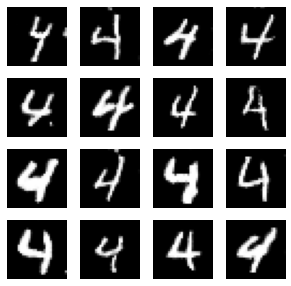

4/4 [==============================] - 0s 4ms/step
7700, [D_loss: 0.329159, acc.: 0.84%], [G_loss: 2.629240]
1/1 [==============================] - 0s 24ms/step


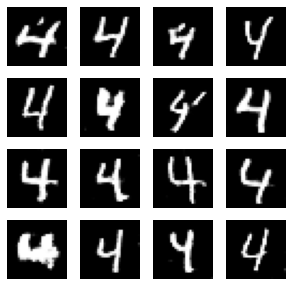

4/4 [==============================] - 0s 4ms/step
7800, [D_loss: 0.423237, acc.: 0.81%], [G_loss: 2.128879]
1/1 [==============================] - 0s 23ms/step


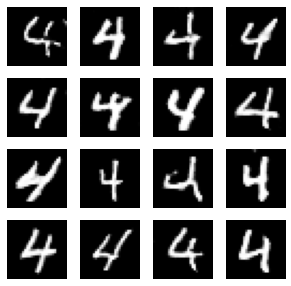

4/4 [==============================] - 0s 5ms/step
7900, [D_loss: 0.248410, acc.: 0.90%], [G_loss: 3.221049]
1/1 [==============================] - 0s 27ms/step


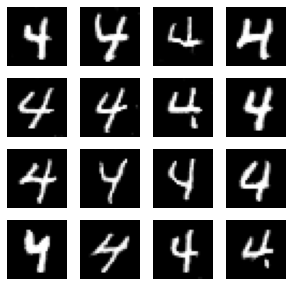

4/4 [==============================] - 0s 3ms/step
8000, [D_loss: 0.252579, acc.: 0.90%], [G_loss: 2.465753]
1/1 [==============================] - 0s 28ms/step


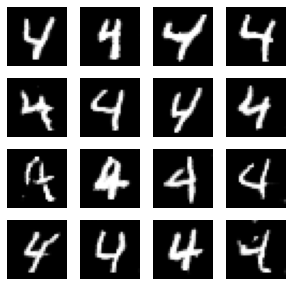

4/4 [==============================] - 0s 4ms/step
8100, [D_loss: 0.337259, acc.: 0.85%], [G_loss: 2.495192]
1/1 [==============================] - 0s 24ms/step


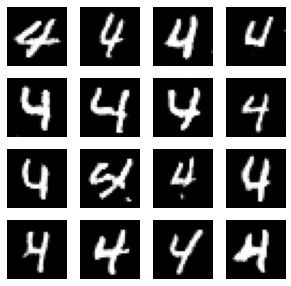

4/4 [==============================] - 0s 5ms/step
8200, [D_loss: 0.313945, acc.: 0.85%], [G_loss: 2.532141]
1/1 [==============================] - 0s 23ms/step


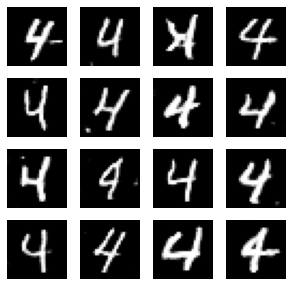

4/4 [==============================] - 0s 6ms/step
8300, [D_loss: 0.277996, acc.: 0.90%], [G_loss: 3.090386]
1/1 [==============================] - 0s 16ms/step


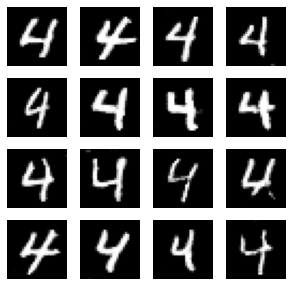

4/4 [==============================] - 0s 4ms/step
8400, [D_loss: 0.392551, acc.: 0.80%], [G_loss: 2.346280]
1/1 [==============================] - 0s 26ms/step


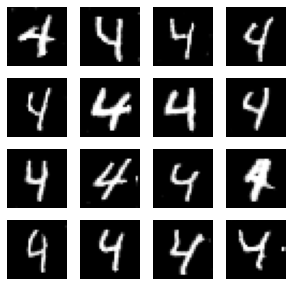

4/4 [==============================] - 0s 7ms/step
8500, [D_loss: 0.280643, acc.: 0.86%], [G_loss: 3.596468]
1/1 [==============================] - 0s 17ms/step


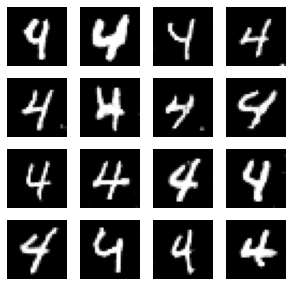

4/4 [==============================] - 0s 6ms/step
8600, [D_loss: 0.251585, acc.: 0.89%], [G_loss: 2.314980]
1/1 [==============================] - 0s 16ms/step


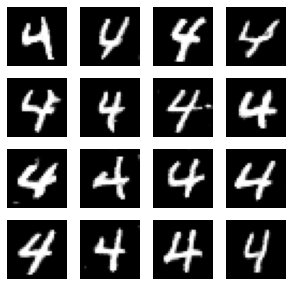

4/4 [==============================] - 0s 4ms/step
8700, [D_loss: 0.487674, acc.: 0.75%], [G_loss: 1.712162]
1/1 [==============================] - 0s 23ms/step


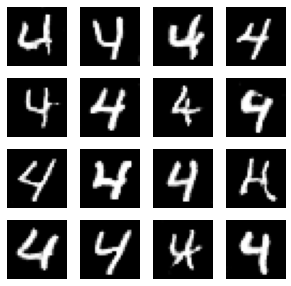

4/4 [==============================] - 0s 4ms/step
8800, [D_loss: 0.267080, acc.: 0.88%], [G_loss: 2.730841]
1/1 [==============================] - 0s 21ms/step


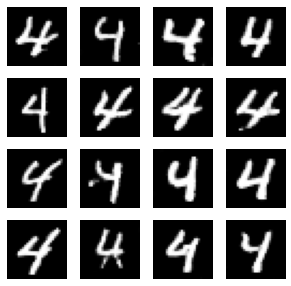

4/4 [==============================] - 0s 4ms/step
8900, [D_loss: 0.276264, acc.: 0.90%], [G_loss: 2.563158]
1/1 [==============================] - 0s 32ms/step


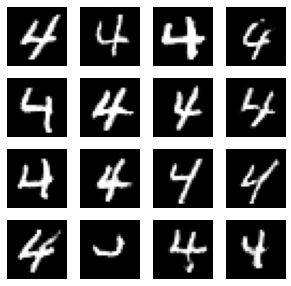

4/4 [==============================] - 0s 5ms/step
9000, [D_loss: 0.426589, acc.: 0.78%], [G_loss: 2.270936]
1/1 [==============================] - 0s 26ms/step


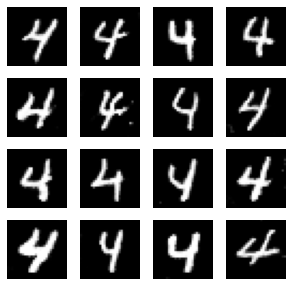

4/4 [==============================] - 0s 4ms/step
9100, [D_loss: 0.514262, acc.: 0.73%], [G_loss: 1.993399]
1/1 [==============================] - 0s 22ms/step


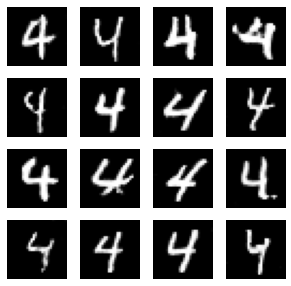

4/4 [==============================] - 0s 4ms/step
9200, [D_loss: 0.314646, acc.: 0.88%], [G_loss: 2.846768]
1/1 [==============================] - 0s 31ms/step


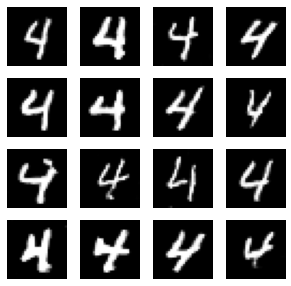

4/4 [==============================] - 0s 3ms/step
9300, [D_loss: 0.316373, acc.: 0.86%], [G_loss: 2.623884]
1/1 [==============================] - 0s 22ms/step


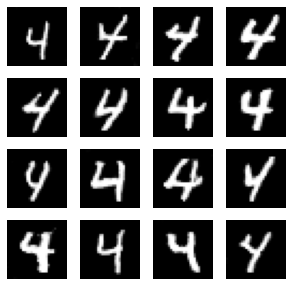

4/4 [==============================] - 0s 5ms/step
9400, [D_loss: 0.268377, acc.: 0.91%], [G_loss: 2.895419]
1/1 [==============================] - 0s 15ms/step


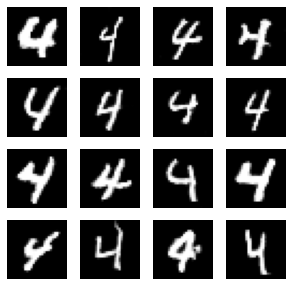

4/4 [==============================] - 0s 5ms/step
9500, [D_loss: 0.210591, acc.: 0.91%], [G_loss: 3.332804]
1/1 [==============================] - 0s 24ms/step


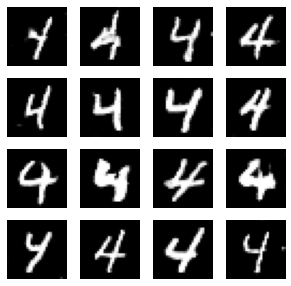

4/4 [==============================] - 0s 4ms/step
9600, [D_loss: 0.327518, acc.: 0.85%], [G_loss: 2.476098]
1/1 [==============================] - 0s 25ms/step


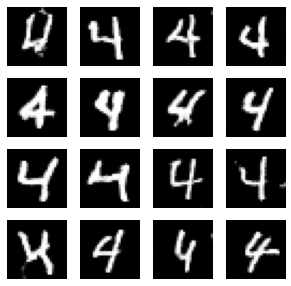

4/4 [==============================] - 0s 4ms/step
9700, [D_loss: 0.491391, acc.: 0.78%], [G_loss: 2.098417]
1/1 [==============================] - 0s 22ms/step


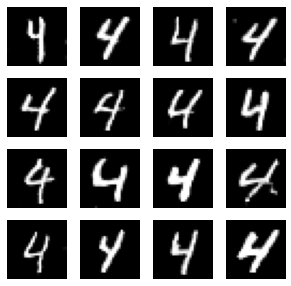

4/4 [==============================] - 0s 4ms/step
9800, [D_loss: 0.467991, acc.: 0.77%], [G_loss: 2.305062]
1/1 [==============================] - 0s 16ms/step


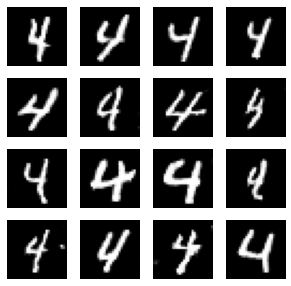

4/4 [==============================] - 0s 5ms/step
9900, [D_loss: 0.405799, acc.: 0.83%], [G_loss: 2.341478]
1/1 [==============================] - 0s 23ms/step


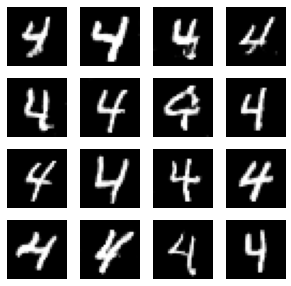

4/4 [==============================] - 0s 4ms/step
10000, [D_loss: 0.295441, acc.: 0.89%], [G_loss: 2.559010]
1/1 [==============================] - 0s 23ms/step


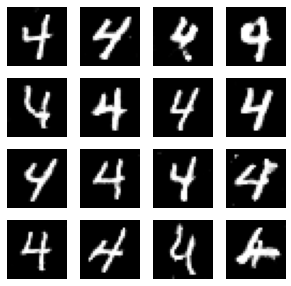

4/4 [==============================] - 0s 5ms/step
10100, [D_loss: 0.367866, acc.: 0.84%], [G_loss: 2.655803]
1/1 [==============================] - 0s 21ms/step


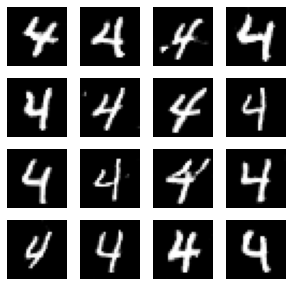

4/4 [==============================] - 0s 4ms/step
10200, [D_loss: 0.421802, acc.: 0.79%], [G_loss: 2.137810]
1/1 [==============================] - 0s 24ms/step


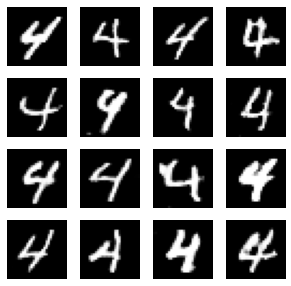

4/4 [==============================] - 0s 4ms/step
10300, [D_loss: 0.371441, acc.: 0.83%], [G_loss: 2.455876]
1/1 [==============================] - 0s 18ms/step


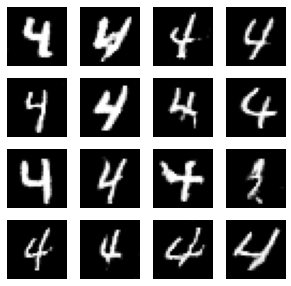

4/4 [==============================] - 0s 5ms/step
10400, [D_loss: 0.295180, acc.: 0.89%], [G_loss: 2.850496]
1/1 [==============================] - 0s 25ms/step


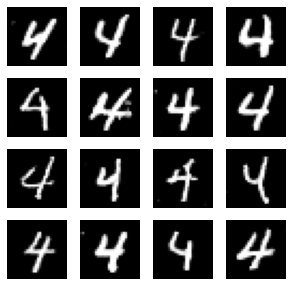

4/4 [==============================] - 0s 4ms/step
10500, [D_loss: 0.282493, acc.: 0.88%], [G_loss: 2.710825]
1/1 [==============================] - 0s 24ms/step


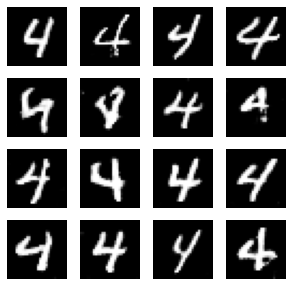

4/4 [==============================] - 0s 4ms/step
10600, [D_loss: 0.429428, acc.: 0.80%], [G_loss: 2.295961]
1/1 [==============================] - 0s 22ms/step


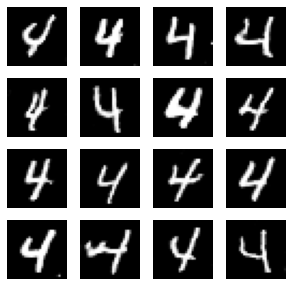

4/4 [==============================] - 0s 4ms/step
10700, [D_loss: 0.408288, acc.: 0.82%], [G_loss: 2.053861]
1/1 [==============================] - 0s 25ms/step


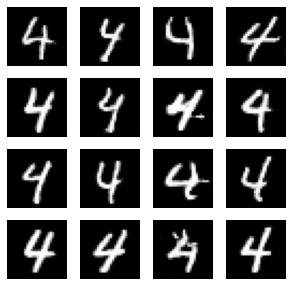

4/4 [==============================] - 0s 6ms/step
10800, [D_loss: 0.443169, acc.: 0.82%], [G_loss: 1.914173]
1/1 [==============================] - 0s 34ms/step


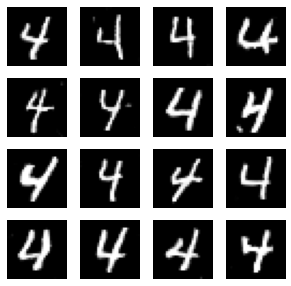

4/4 [==============================] - 0s 4ms/step
10900, [D_loss: 0.383433, acc.: 0.83%], [G_loss: 2.150237]
1/1 [==============================] - 0s 29ms/step


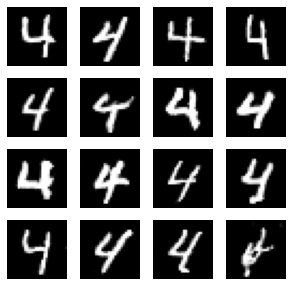

4/4 [==============================] - 0s 4ms/step
11000, [D_loss: 0.289769, acc.: 0.88%], [G_loss: 2.728391]
1/1 [==============================] - 0s 22ms/step


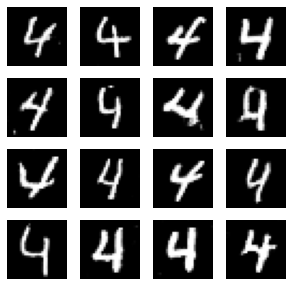

4/4 [==============================] - 0s 4ms/step
11100, [D_loss: 0.338443, acc.: 0.88%], [G_loss: 2.680665]
1/1 [==============================] - 0s 25ms/step


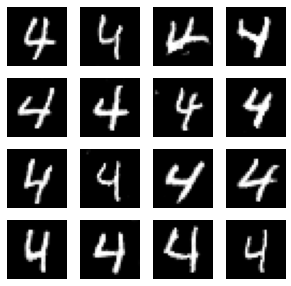

4/4 [==============================] - 0s 4ms/step
11200, [D_loss: 0.445285, acc.: 0.80%], [G_loss: 1.990670]
1/1 [==============================] - 0s 20ms/step


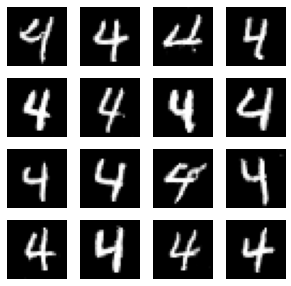

4/4 [==============================] - 0s 4ms/step
11300, [D_loss: 0.289641, acc.: 0.88%], [G_loss: 2.554313]
1/1 [==============================] - 0s 21ms/step


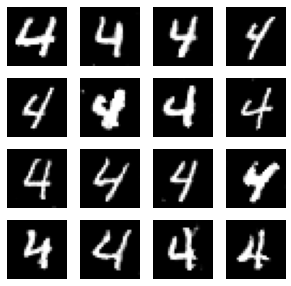

4/4 [==============================] - 0s 4ms/step
11400, [D_loss: 0.310579, acc.: 0.86%], [G_loss: 2.777471]
1/1 [==============================] - 0s 22ms/step


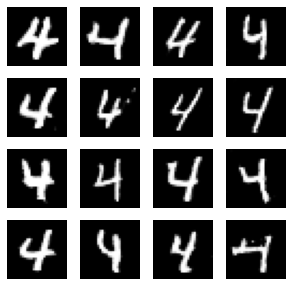

4/4 [==============================] - 0s 4ms/step
11500, [D_loss: 0.265278, acc.: 0.90%], [G_loss: 2.641615]
1/1 [==============================] - 0s 20ms/step


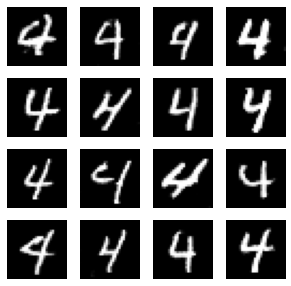

4/4 [==============================] - 0s 3ms/step
11600, [D_loss: 0.300866, acc.: 0.89%], [G_loss: 2.723892]
1/1 [==============================] - 0s 23ms/step


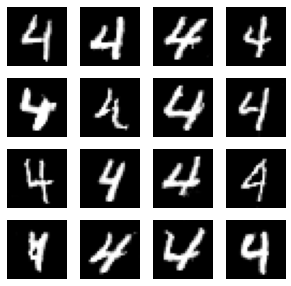

4/4 [==============================] - 0s 3ms/step
11700, [D_loss: 0.281601, acc.: 0.89%], [G_loss: 2.499416]
1/1 [==============================] - 0s 32ms/step


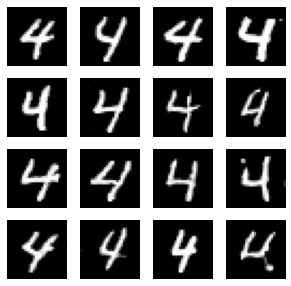

4/4 [==============================] - 0s 5ms/step
11800, [D_loss: 0.261403, acc.: 0.89%], [G_loss: 2.075773]
1/1 [==============================] - 0s 25ms/step


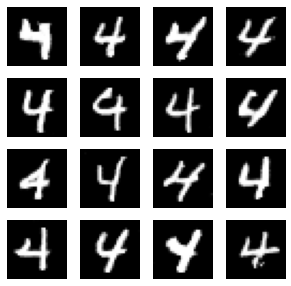

4/4 [==============================] - 0s 4ms/step
11900, [D_loss: 0.377434, acc.: 0.86%], [G_loss: 2.326852]
1/1 [==============================] - 0s 22ms/step


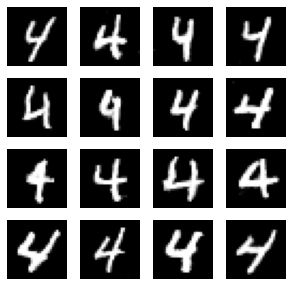

4/4 [==============================] - 0s 4ms/step
12000, [D_loss: 0.218355, acc.: 0.91%], [G_loss: 2.541303]
1/1 [==============================] - 0s 21ms/step


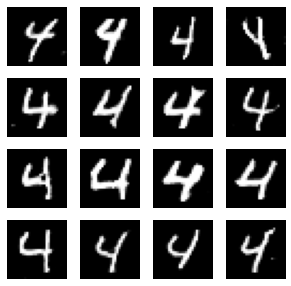

4/4 [==============================] - 0s 4ms/step
12100, [D_loss: 0.347514, acc.: 0.84%], [G_loss: 2.524070]
1/1 [==============================] - 0s 45ms/step


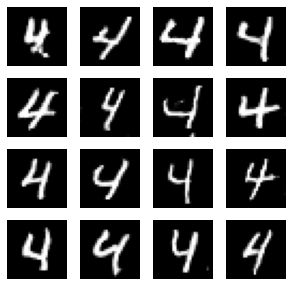

4/4 [==============================] - 0s 5ms/step
12200, [D_loss: 0.296344, acc.: 0.88%], [G_loss: 2.530064]
1/1 [==============================] - 0s 21ms/step


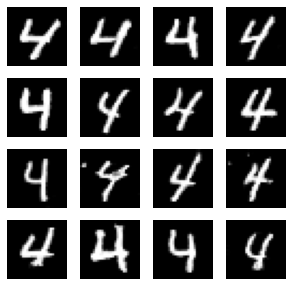

4/4 [==============================] - 0s 4ms/step
12300, [D_loss: 0.319920, acc.: 0.85%], [G_loss: 2.296984]
1/1 [==============================] - 0s 22ms/step


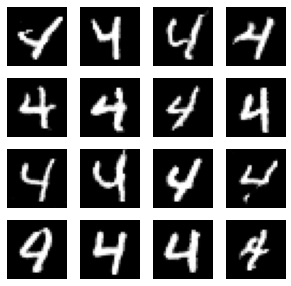

4/4 [==============================] - 0s 3ms/step
12400, [D_loss: 0.278271, acc.: 0.90%], [G_loss: 2.768512]
1/1 [==============================] - 0s 22ms/step


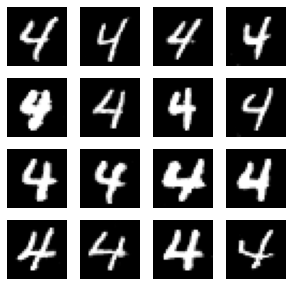

4/4 [==============================] - 0s 4ms/step
12500, [D_loss: 0.332334, acc.: 0.87%], [G_loss: 2.380492]
1/1 [==============================] - 0s 37ms/step


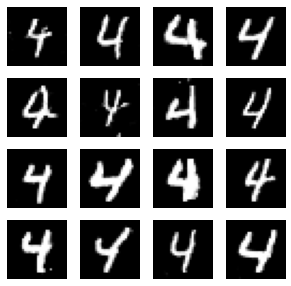

4/4 [==============================] - 0s 4ms/step
12600, [D_loss: 0.271207, acc.: 0.89%], [G_loss: 2.648061]
1/1 [==============================] - 0s 22ms/step


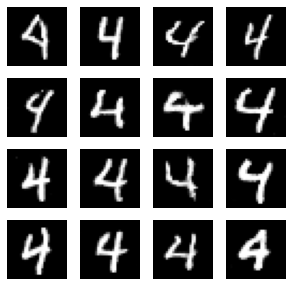

4/4 [==============================] - 0s 4ms/step
12700, [D_loss: 0.314168, acc.: 0.86%], [G_loss: 2.486418]
1/1 [==============================] - 0s 22ms/step


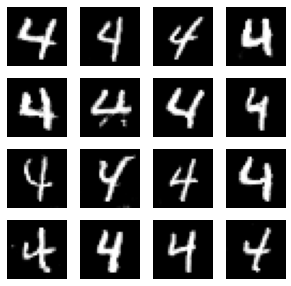

4/4 [==============================] - 0s 5ms/step
12800, [D_loss: 0.377442, acc.: 0.82%], [G_loss: 2.605336]
1/1 [==============================] - 0s 26ms/step


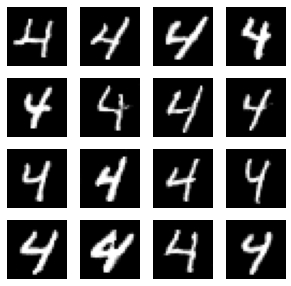

4/4 [==============================] - 0s 4ms/step
12900, [D_loss: 0.329991, acc.: 0.88%], [G_loss: 2.361418]
1/1 [==============================] - 0s 28ms/step


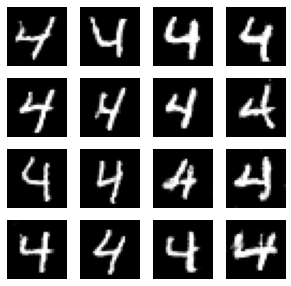

4/4 [==============================] - 0s 4ms/step
13000, [D_loss: 0.403702, acc.: 0.81%], [G_loss: 2.425351]
1/1 [==============================] - 0s 21ms/step


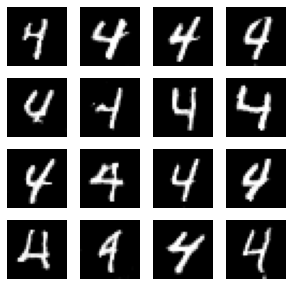

4/4 [==============================] - 0s 6ms/step
13100, [D_loss: 0.376622, acc.: 0.85%], [G_loss: 2.452762]
1/1 [==============================] - 0s 31ms/step


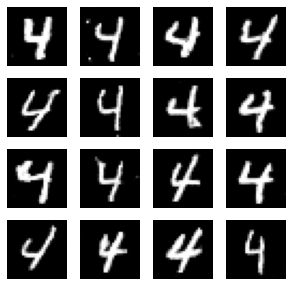

4/4 [==============================] - 0s 4ms/step
13200, [D_loss: 0.265487, acc.: 0.91%], [G_loss: 2.777691]
1/1 [==============================] - 0s 21ms/step


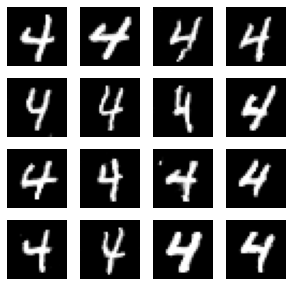

4/4 [==============================] - 0s 3ms/step
13300, [D_loss: 0.334775, acc.: 0.83%], [G_loss: 3.120028]
1/1 [==============================] - 0s 21ms/step


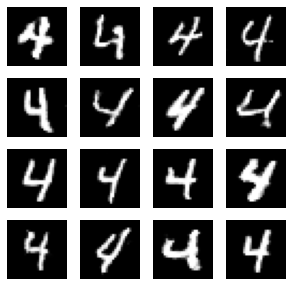

4/4 [==============================] - 0s 4ms/step
13400, [D_loss: 0.284999, acc.: 0.89%], [G_loss: 2.568083]
1/1 [==============================] - 0s 21ms/step


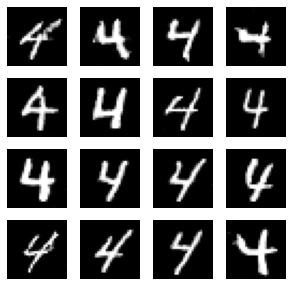

4/4 [==============================] - 0s 4ms/step
13500, [D_loss: 0.305099, acc.: 0.88%], [G_loss: 2.552516]
1/1 [==============================] - 0s 20ms/step


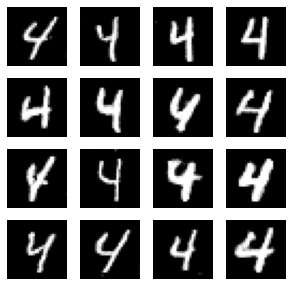

4/4 [==============================] - 0s 7ms/step
13600, [D_loss: 0.319222, acc.: 0.88%], [G_loss: 2.438732]
1/1 [==============================] - 0s 20ms/step


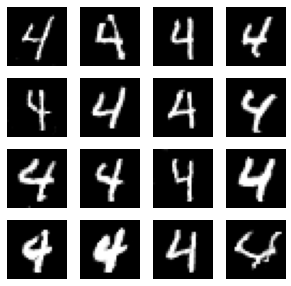

4/4 [==============================] - 0s 4ms/step
13700, [D_loss: 0.262106, acc.: 0.89%], [G_loss: 2.695972]
1/1 [==============================] - 0s 20ms/step


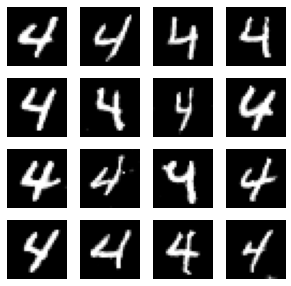

4/4 [==============================] - 0s 3ms/step
13800, [D_loss: 0.272600, acc.: 0.87%], [G_loss: 2.499776]
1/1 [==============================] - 0s 20ms/step


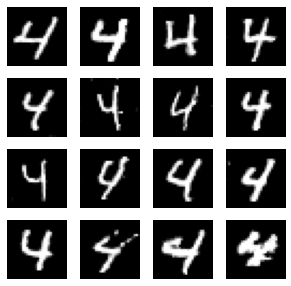

4/4 [==============================] - 0s 4ms/step
13900, [D_loss: 0.273026, acc.: 0.90%], [G_loss: 2.636017]
1/1 [==============================] - 0s 21ms/step


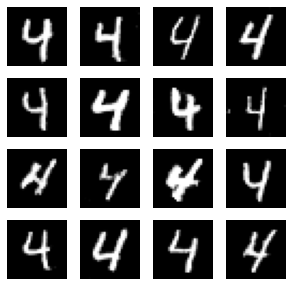

4/4 [==============================] - 0s 4ms/step
14000, [D_loss: 0.290120, acc.: 0.88%], [G_loss: 2.410100]
1/1 [==============================] - 0s 24ms/step


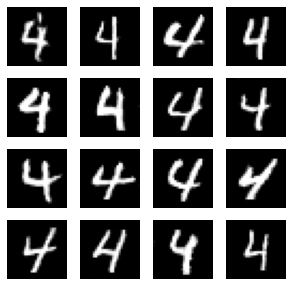

4/4 [==============================] - 0s 4ms/step
14100, [D_loss: 0.263636, acc.: 0.89%], [G_loss: 2.684343]
1/1 [==============================] - 0s 25ms/step


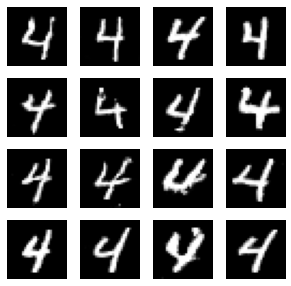

4/4 [==============================] - 0s 6ms/step
14200, [D_loss: 0.296283, acc.: 0.88%], [G_loss: 2.555487]
1/1 [==============================] - 0s 24ms/step


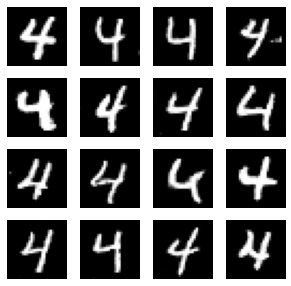

4/4 [==============================] - 0s 4ms/step
14300, [D_loss: 0.245767, acc.: 0.92%], [G_loss: 2.789620]
1/1 [==============================] - 0s 33ms/step


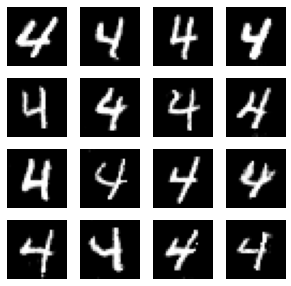

4/4 [==============================] - 0s 5ms/step
14400, [D_loss: 0.221484, acc.: 0.92%], [G_loss: 3.102578]
1/1 [==============================] - 0s 24ms/step


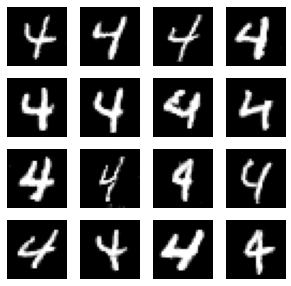

4/4 [==============================] - 0s 5ms/step
14500, [D_loss: 0.233500, acc.: 0.91%], [G_loss: 2.776470]
1/1 [==============================] - 0s 24ms/step


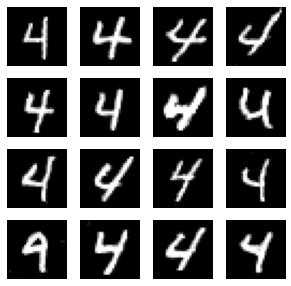

4/4 [==============================] - 0s 4ms/step
14600, [D_loss: 0.244559, acc.: 0.91%], [G_loss: 3.108267]
1/1 [==============================] - 0s 25ms/step


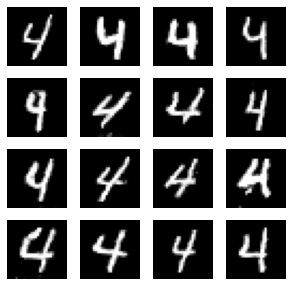

4/4 [==============================] - 0s 4ms/step
14700, [D_loss: 0.249699, acc.: 0.90%], [G_loss: 3.299347]
1/1 [==============================] - 0s 36ms/step


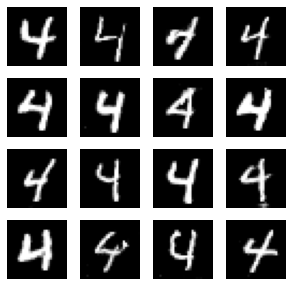

4/4 [==============================] - 0s 5ms/step
14800, [D_loss: 0.244560, acc.: 0.91%], [G_loss: 3.284806]
1/1 [==============================] - 0s 26ms/step


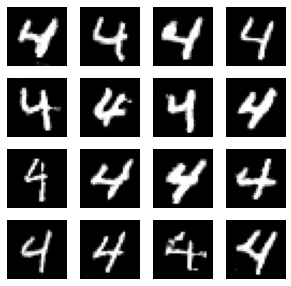

4/4 [==============================] - 0s 4ms/step
14900, [D_loss: 0.199405, acc.: 0.93%], [G_loss: 3.324755]
1/1 [==============================] - 0s 23ms/step


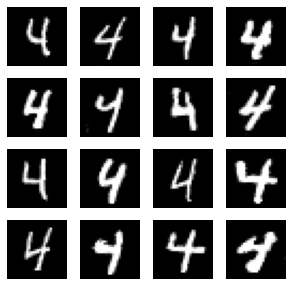

4/4 [==============================] - 0s 4ms/step
15000, [D_loss: 0.238840, acc.: 0.88%], [G_loss: 3.128556]
1/1 [==============================] - 0s 24ms/step


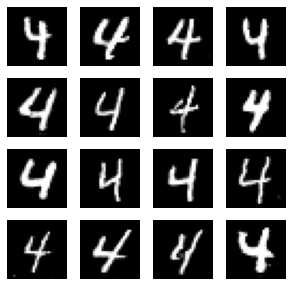

4/4 [==============================] - 0s 4ms/step
15100, [D_loss: 0.198309, acc.: 0.93%], [G_loss: 3.523763]
1/1 [==============================] - 0s 31ms/step


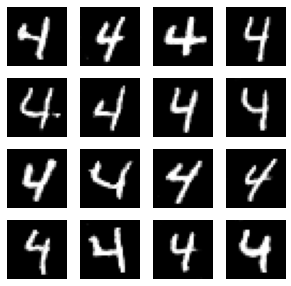

4/4 [==============================] - 0s 4ms/step
15200, [D_loss: 0.284493, acc.: 0.91%], [G_loss: 3.158097]
1/1 [==============================] - 0s 27ms/step


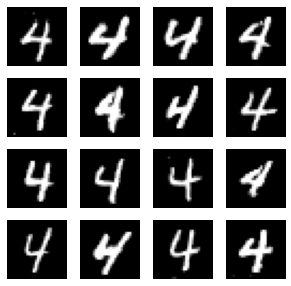

4/4 [==============================] - 0s 5ms/step
15300, [D_loss: 0.237661, acc.: 0.91%], [G_loss: 3.336274]
1/1 [==============================] - 0s 25ms/step


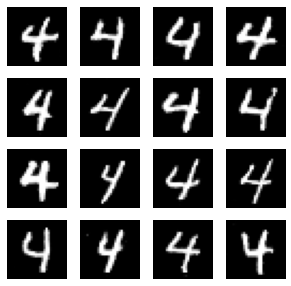

4/4 [==============================] - 0s 4ms/step
15400, [D_loss: 0.272806, acc.: 0.89%], [G_loss: 3.325797]
1/1 [==============================] - 0s 21ms/step


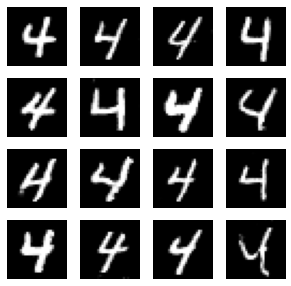

4/4 [==============================] - 0s 4ms/step
15500, [D_loss: 0.256892, acc.: 0.90%], [G_loss: 3.124038]
1/1 [==============================] - 0s 35ms/step


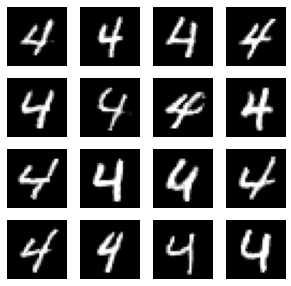

4/4 [==============================] - 0s 5ms/step
15600, [D_loss: 0.241965, acc.: 0.94%], [G_loss: 3.115041]
1/1 [==============================] - 0s 22ms/step


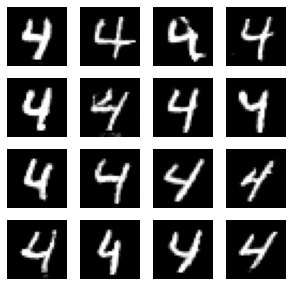

4/4 [==============================] - 0s 4ms/step
15700, [D_loss: 0.224050, acc.: 0.91%], [G_loss: 2.782904]
1/1 [==============================] - 0s 27ms/step


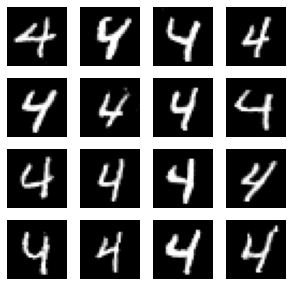

4/4 [==============================] - 0s 4ms/step
15800, [D_loss: 0.211023, acc.: 0.91%], [G_loss: 3.693610]
1/1 [==============================] - 0s 22ms/step


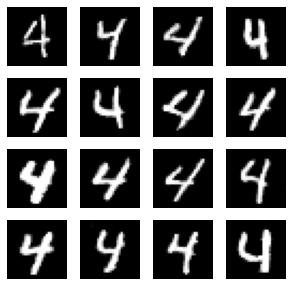

4/4 [==============================] - 0s 4ms/step
15900, [D_loss: 0.230578, acc.: 0.92%], [G_loss: 3.655719]
1/1 [==============================] - 0s 23ms/step


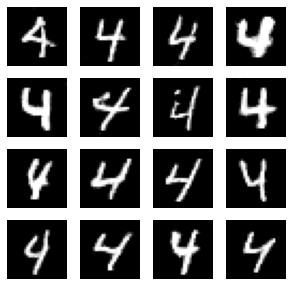

4/4 [==============================] - 0s 4ms/step
16000, [D_loss: 0.293548, acc.: 0.86%], [G_loss: 3.270280]
1/1 [==============================] - 0s 23ms/step


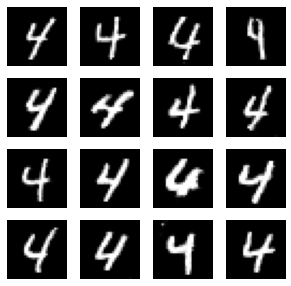

4/4 [==============================] - 0s 3ms/step
16100, [D_loss: 0.182618, acc.: 0.95%], [G_loss: 3.535190]
1/1 [==============================] - 0s 20ms/step


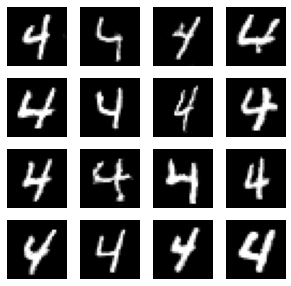

4/4 [==============================] - 0s 4ms/step
16200, [D_loss: 0.219189, acc.: 0.91%], [G_loss: 3.887215]
1/1 [==============================] - 0s 26ms/step


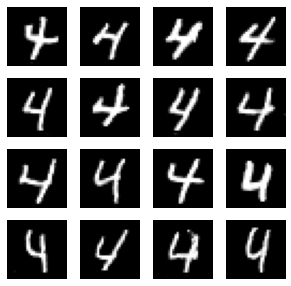

4/4 [==============================] - 0s 4ms/step
16300, [D_loss: 0.237790, acc.: 0.91%], [G_loss: 3.723739]
1/1 [==============================] - 0s 19ms/step


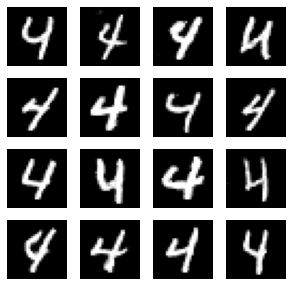

4/4 [==============================] - 0s 4ms/step
16400, [D_loss: 0.262149, acc.: 0.91%], [G_loss: 3.773832]
1/1 [==============================] - 0s 20ms/step


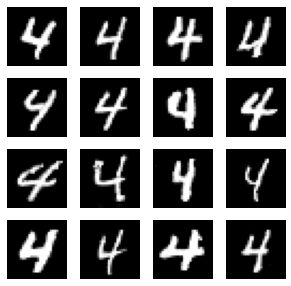

4/4 [==============================] - 0s 4ms/step
16500, [D_loss: 0.198634, acc.: 0.95%], [G_loss: 3.227021]
1/1 [==============================] - 0s 24ms/step


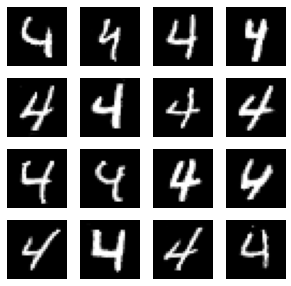

4/4 [==============================] - 0s 7ms/step
16600, [D_loss: 0.191941, acc.: 0.93%], [G_loss: 3.691401]
1/1 [==============================] - 0s 20ms/step


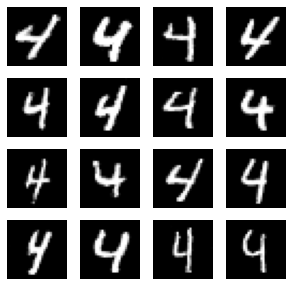

4/4 [==============================] - 0s 4ms/step
16700, [D_loss: 0.288612, acc.: 0.91%], [G_loss: 3.572653]
1/1 [==============================] - 0s 30ms/step


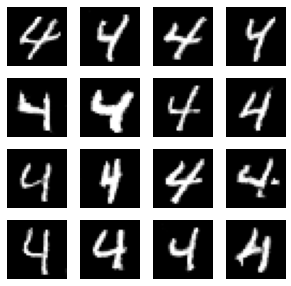

4/4 [==============================] - 0s 4ms/step
16800, [D_loss: 0.172816, acc.: 0.95%], [G_loss: 3.504558]
1/1 [==============================] - 0s 22ms/step


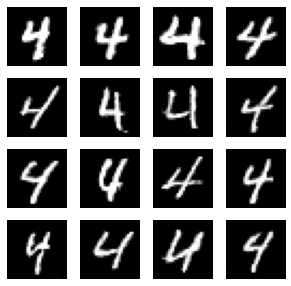

4/4 [==============================] - 0s 4ms/step
16900, [D_loss: 0.209962, acc.: 0.93%], [G_loss: 3.532169]
1/1 [==============================] - 0s 19ms/step


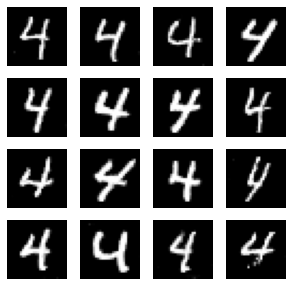

1/4 [======>.......................] - ETA: 0s

KeyboardInterrupt: ignored

In [11]:
for epoch in range(epochs):
    idx = np.random.randint(0, x_train.shape[0], batch_size)
    real_imgs = x_train[idx]

    z = np.random.normal(0, 1, (batch_size, noise))
    fake_imgs = generator.predict(z)

    d_hist_real = discriminator.train_on_batch(real_imgs, real)
    #.fit : epoch만큼 반복 학습 / .train_on_batch : 반복하지 않고 batch를 준 묶음만 1회 학습 후 종료
    d_hist_fake = discriminator.train_on_batch(fake_imgs, fake)

    d_loss, d_acc = np.add(d_hist_fake, d_hist_real) * 0.5

    discriminator.trainable = False

    if epoch % 2 ==0:
        z = np.random.normal(0, 1, (batch_size, noise))
        gan_hist = gan_model.train_on_batch(z, real)

    if epoch % sample_interval == 0:
        print('%d, [D_loss: %f, acc.: %.2f%%], [G_loss: %f]'%(
            epoch, d_loss, d_acc, gan_hist))
        row = col = 4
        z = np.random.normal(0, 1, (row * col, noise))
        fake_imgs = generator.predict(z)
        fake_imgs = 0.5 * fake_imgs + 0.5
        _, axs = plt.subplots(row, col, figsize=(5, 5), sharey=True, sharex=True)
        cont = 0
        for i in range(row):
            for j in range(col):
                axs[i, j].imshow(fake_imgs[cont, :, :, 0], cmap='gray')
                axs[i, j].axis('off')
                cont += 1
        path = os.path.join(OUT_DIR, 'img-{}'.format(epoch+1))
        plt.show()
        plt.close()
        generator.save('/content/drive/MyDrive/GAN_models/generator_mnist_{}.h5'.format(MY_NUMBER))


In [12]:
number_GAN_models = []
for i in range(10):
  number_GAN_models.append(load_model(
     '/content/drive/MyDrive/GAN_models/generator_mnist_{}.h5'.format(i)))

In [16]:
four_digit_number = '4621'

In [17]:
imgs = []
for i in four_digit_number:
  i = int(i)
  z = np.random.normal(0, 1, (1, 100))
  fake_img = number_GAN_models[i].predict(z)
  fake_img = 0.5 * fake_img + 0.5
  print(fake_img.shape)
  imgs.append(fake_img.reshape(28, 28))
  

1/1 [==============================] - 0s 16ms/step


(1, 28, 28, 1)
1/1 [==============================] - 0s 104ms/step
(1, 28, 28, 1)
1/1 [==============================] - 0s 15ms/step
(1, 28, 28, 1)
1/1 [==============================] - 0s 18ms/step
(1, 28, 28, 1)


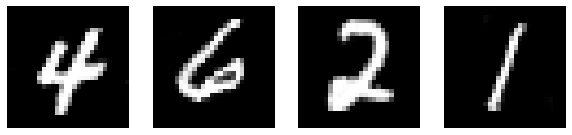

In [18]:
_, axs = plt.subplots(1, 4, figsize=(10,40), sharex = True, sharey = True)
for i in range(4):
  axs[i].imshow(imgs[i], cmap = 'gray')
  axs[i].axis('off')
plt.show()

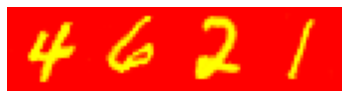

In [25]:
img = imgs[0]
for i in range(1, 4):
  img = np.append(img, imgs[i], axis = 1)
plt.autumn()
plt.imshow(img)
plt.axis('off')
plt.show()



354528
1/1 [==============================] - 0s 14ms/step
(1, 28, 28, 1)
1/1 [==============================] - 0s 94ms/step
(1, 28, 28, 1)
1/1 [==============================] - 0s 14ms/step
(1, 28, 28, 1)
1/1 [==============================] - 0s 13ms/step
(1, 28, 28, 1)
1/1 [==============================] - 0s 17ms/step
(1, 28, 28, 1)
1/1 [==============================] - 0s 14ms/step
(1, 28, 28, 1)


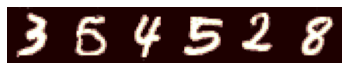

In [29]:
input_value = input()
imgs = []
for i in input_value:
  i = int(i)
  z = np.random.normal(0, 1, (1, 100))
  fake_img = number_GAN_models[i].predict(z)
  fake_img = 0.5 * fake_img + 0.5
  print(fake_img.shape)
  imgs.append(fake_img.reshape(28, 28))
img = imgs[0]
for i in range(1, len(input_value)):
  img = np.append(img, imgs[i], axis = 1)
plt.pink()
plt.imshow(img)
plt.axis('off')
plt.show()